<a href="https://colab.research.google.com/github/hanghae-plus-AI/AI-1-tolluset/blob/main/week4/4-advance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers datasets evaluate accelerate scikit-learn

In [2]:
import random
import evaluate
import numpy as np

from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification

✅ load_dataset("nyu-mll/glue", "mnli") 로 dataset을 불러옵니다.


In [3]:
mnli = load_dataset("nyu-mll/glue", "mnli")
mnli

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/35.3k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/52.2M [00:00<?, ?B/s]

(…)alidation_matched-00000-of-00001.parquet:   0%|          | 0.00/1.21M [00:00<?, ?B/s]

(…)dation_mismatched-00000-of-00001.parquet:   0%|          | 0.00/1.25M [00:00<?, ?B/s]

test_matched-00000-of-00001.parquet:   0%|          | 0.00/1.22M [00:00<?, ?B/s]

test_mismatched-00000-of-00001.parquet:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/392702 [00:00<?, ? examples/s]

Generating validation_matched split:   0%|          | 0/9815 [00:00<?, ? examples/s]

Generating validation_mismatched split:   0%|          | 0/9832 [00:00<?, ? examples/s]

Generating test_matched split:   0%|          | 0/9796 [00:00<?, ? examples/s]

Generating test_mismatched split:   0%|          | 0/9847 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['premise', 'hypothesis', 'label', 'idx'],
        num_rows: 392702
    })
    validation_matched: Dataset({
        features: ['premise', 'hypothesis', 'label', 'idx'],
        num_rows: 9815
    })
    validation_mismatched: Dataset({
        features: ['premise', 'hypothesis', 'label', 'idx'],
        num_rows: 9832
    })
    test_matched: Dataset({
        features: ['premise', 'hypothesis', 'label', 'idx'],
        num_rows: 9796
    })
    test_mismatched: Dataset({
        features: ['premise', 'hypothesis', 'label', 'idx'],
        num_rows: 9847
    })
})

In [4]:
mnli['train'][0]

{'premise': 'Conceptually cream skimming has two basic dimensions - product and geography.',
 'hypothesis': 'Product and geography are what make cream skimming work. ',
 'label': 1,
 'idx': 0}

✅ 분류 레이블은 3개

In [6]:
mnli['train'].features

{'premise': Value(dtype='string', id=None),
 'hypothesis': Value(dtype='string', id=None),
 'label': ClassLabel(names=['entailment', 'neutral', 'contradiction'], id=None),
 'idx': Value(dtype='int32', id=None)}

In [104]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

def preprocess_function(data):
    return tokenizer(data["premise"], data["hypothesis"], truncation=True, padding=True)

mnli_tokenized = mnli.map(preprocess_function, batched=True)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning:

`clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884



Map:   0%|          | 0/9815 [00:00<?, ? examples/s]

In [9]:
mnli_tokenized['train'][0].keys()

dict_keys(['premise', 'hypothesis', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'])

In [13]:
for key, value in mnli_tokenized['train'][0].items():
    print(f"{key}: {value}")

premise: Conceptually cream skimming has two basic dimensions - product and geography.
hypothesis: Product and geography are what make cream skimming work. 
label: 1
idx: 0
input_ids: [101, 28103, 14795, 7081, 10458, 25004, 1144, 1160, 3501, 10082, 118, 3317, 1105, 14534, 119, 102, 22249, 1105, 14534, 1132, 1184, 1294, 7081, 10458, 25004, 1250, 119, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
token_type_ids: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [14]:
tokenizer.decode(mnli_tokenized['train'][0]["input_ids"], skip_special_tokens=False)

'[CLS] Conceptually cream skimming has two basic dimensions - product and geography. [SEP] Product and geography are what make cream skimming work. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] 

In [18]:
mnli_tokenized

DatasetDict({
    train: Dataset({
        features: ['premise', 'hypothesis', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 392702
    })
    validation_matched: Dataset({
        features: ['premise', 'hypothesis', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 9815
    })
    validation_mismatched: Dataset({
        features: ['premise', 'hypothesis', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 9832
    })
    test_matched: Dataset({
        features: ['premise', 'hypothesis', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 9796
    })
    test_mismatched: Dataset({
        features: ['premise', 'hypothesis', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 9847
    })
})

✅ Validation data가 필요한 경우, train split에서 가져오셔야 합니다.

In [19]:
mnli_split = mnli_tokenized['train'].train_test_split(test_size=0.2)
mnli_train, mnli_val = mnli_split['train'], mnli_split['test']
mnli_test = mnli_tokenized['validation_matched']

In [20]:
len(mnli_train), len(mnli_val), len(mnli_test)

(314161, 78541, 9815)

✅ 레이블 클래스 3개로 변경


In [21]:
from transformers import BertConfig

config = BertConfig()

config.hidden_size = 64  # BERT layer의 기본 hidden dimension
config.intermediate_size = 64  # FFN layer의 중간 hidden dimension
config.num_hidden_layers = 2  # BERT layer의 개수
config.num_attention_heads = 4  # Multi-head attention에서 사용하는 head 개수
config.num_labels = 3  # 마지막에 예측해야 하는 분류 문제의 class 개수

model = AutoModelForSequenceClassification.from_config(config)

In [22]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir='hf_transformer',  # 모델, log 등을 저장할 directory
    num_train_epochs=10,  # epoch 수
    per_device_train_batch_size=128,  # training data의 batch size
    per_device_eval_batch_size=128,  # validation data의 batch size
    logging_strategy="epoch",  # Epoch가 끝날 때마다 training loss 등을 log하라는 의미
    do_train=True,  # 학습을 진행하겠다는 의미
    do_eval=True,  # 학습 중간에 validation data에 대한 평가를 수행하겠다는 의미
    eval_strategy="epoch",  # 매 epoch가 끝날 때마다 validation data에 대한 평가를 수행한다는 의미
    save_strategy="epoch",  # 매 epoch가 끝날 때마다 모델을 저장하겠다는 의미
    learning_rate=1e-3,  # optimizer에 사용할 learning rate
    load_best_model_at_end=True  # 학습이 끝난 후, validation data에 대한 성능이 가장 좋은 모델을 채택하겠다는 의미
)

In [23]:
import evaluate

accuracy = evaluate.load("accuracy")


def compute_metrics(pred):
    predictions, labels = pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

In [24]:
from transformers import EarlyStoppingCallback


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=mnli_train,
    eval_dataset=mnli_val,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,
    callbacks = [EarlyStoppingCallback(early_stopping_patience=1)]
)

✅ trainer.train()를 통해 학습된 log가 남아있어야 합니다.

In [25]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.977200,0.908912,0.568735
2,0.878500,0.886113,0.587922
3,0.823000,0.881533,0.601788
4,0.774100,0.891275,0.603583


TrainOutput(global_step=9820, training_loss=0.8632021529125827, metrics={'train_runtime': 1921.7199, 'train_samples_per_second': 1634.791, 'train_steps_per_second': 12.775, 'total_flos': 171038717650080.0, 'train_loss': 0.8632021529125827, 'epoch': 4.0})

✅
Dataset의 validation_matched에 대한 성능을 출력하고, 50%를 넘기셔야 합니다.

In [26]:
trainer.evaluate(mnli_test)

{'eval_loss': 0.8548181653022766,
 'eval_accuracy': 0.6163015792154865,
 'eval_runtime': 5.6644,
 'eval_samples_per_second': 1732.753,
 'eval_steps_per_second': 13.594,
 'epoch': 4.0}

In [27]:
trainer.save_model()

In [81]:
validation_mismatched = mnli_tokenized["validation_mismatched"]
validation_mismatched

Dataset({
    features: ['premise', 'hypothesis', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 9832
})

In [ ]:
from transformers import pipeline


classifier = pipeline("sentiment-analysis", model="./hf_transformer/", device='cuda')

nums = len(validation_mismatched)
correct = 0
avg_score = 0

for idx, item in enumerate(validation_mismatched):
  premise, hypothesis, label = item["premise"], item["hypothesis"], item["label"]
  label = "LABEL_" + str(label)
  prediction = classifier(f"{premise} {hypothesis}")

  if prediction[0]["label"] == label:
    correct += 1

  score = prediction[0]["score"]
  avg_score += score

In [133]:
import matplotlib.pyplot as plt

<BarContainer object of 2 artists>

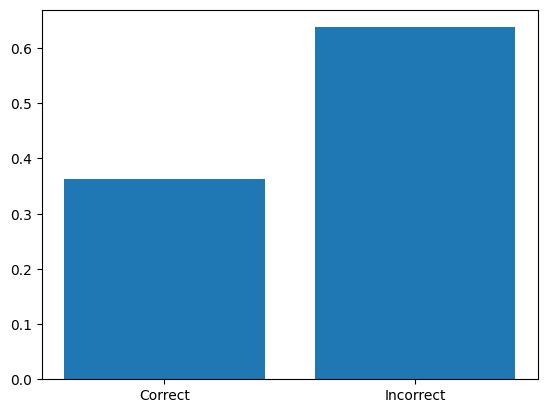

In [136]:
plt.bar(
    ["Correct", "Incorrect"],
    [correct / nums, (nums - correct) / nums],
)

In [138]:
print("correct:", correct/ nums, "incorrect:", (nums - correct) / nums, "avg_score:", (avg_score) / nums)

correct: 0.36230259806418746 incorrect: 0.6376974019358125 avg_score: 0.7315653838372874


모델 정확도는 61% 이지만, validation_mismatched 데이터에 대한 평균 스코어는 73% 지만 실제 맞춘 경우는 36%.


In [114]:
validation_matched = mnli_tokenized["validation_matched"]
validation_matched

Dataset({
    features: ['premise', 'hypothesis', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 9815
})

In [ ]:
from transformers import pipeline


nums = len(validation_matched)
correct = 0
avg_score = 0

for idx, item in enumerate(validation_matched):
  premise, hypothesis, label = item["premise"], item["hypothesis"], item["label"]
  label = "LABEL_" + str(label)
  prediction = classifier(f"{premise} {hypothesis}")

  if prediction[0]["label"] == label:
    correct += 1

  score = prediction[0]["score"]
  avg_score += score

<BarContainer object of 2 artists>

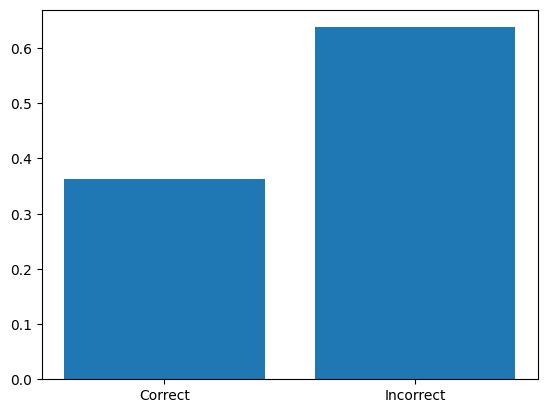

In [139]:
plt.bar(
    ["Correct", "Incorrect"],
    [correct / nums, (nums - correct) / nums],
)

In [140]:
print("correct:", correct/ nums, "incorrect:", (nums - correct) / nums, "avg_score:", (avg_score) / nums)

correct: 0.36230259806418746 incorrect: 0.6376974019358125 avg_score: 0.7315653838372874


validation_matched 데이터에 대한 평균 스코어는 73% 지만 실제 맞춘 경우는 36%.

학습에 사용한 데이터도 비슷하게 나옴.